\begin{cases} \frac{dx}{dt}=v \\ \frac{dv}{dt}=-c v - sin (x) + F cos (wt)\end{cases}

In [1]:
pip install matplotlib --upgrade

In [2]:
import numpy as np

h = 0.01
c = 0.05
w = 0.7
x0 = 1
v0 = 1
t0=0

def dx(x, v, t):
  return v

def dv(x,v, t):
  return -c*v -np.sin(x) + F*np.cos(w*t)

def RK4_ordem2(f, g, h, x0, v0, t0, tf): 
  t = np.zeros(tf)
  v = np.copy(t)
  x = np.copy(t)
  x[0] = x[0]
  v[0] = v0
  t[0] = t0

  for i in range(len(t)-1):

    k1_x = h*f(x[i], v[i], t[i])
    k1_v = h*g(x[i], v[i], t[i])
    xm = x[i] + k1_x/2
    vm = v[i] + k1_v/2

    k2_x = h*vm
    k2_v = h*g(xm, vm, t[i]+h/2)
    xm = x[i] + k2_x/2
    vm = v[i] + k2_v/2

    k3_x = h*vm
    k3_v = h*g(xm, vm, t[i]+h/2)
    xm = x[i] + k3_x
    vm = v[i] + k3_v


    k4_x = h*vm
    k4_v = h*g(xm, vm, t[i]+h/2)

    x[i+1] = x[i]+1/6*(k1_x + 2*k2_x + 2*k3_x + k4_x) 
    v[i+1] = v[i]+1/6*(k1_v + 2*k2_v + 2*k3_v + k4_v) 
    t[i+1] = t[i] + h
  return t, x, v

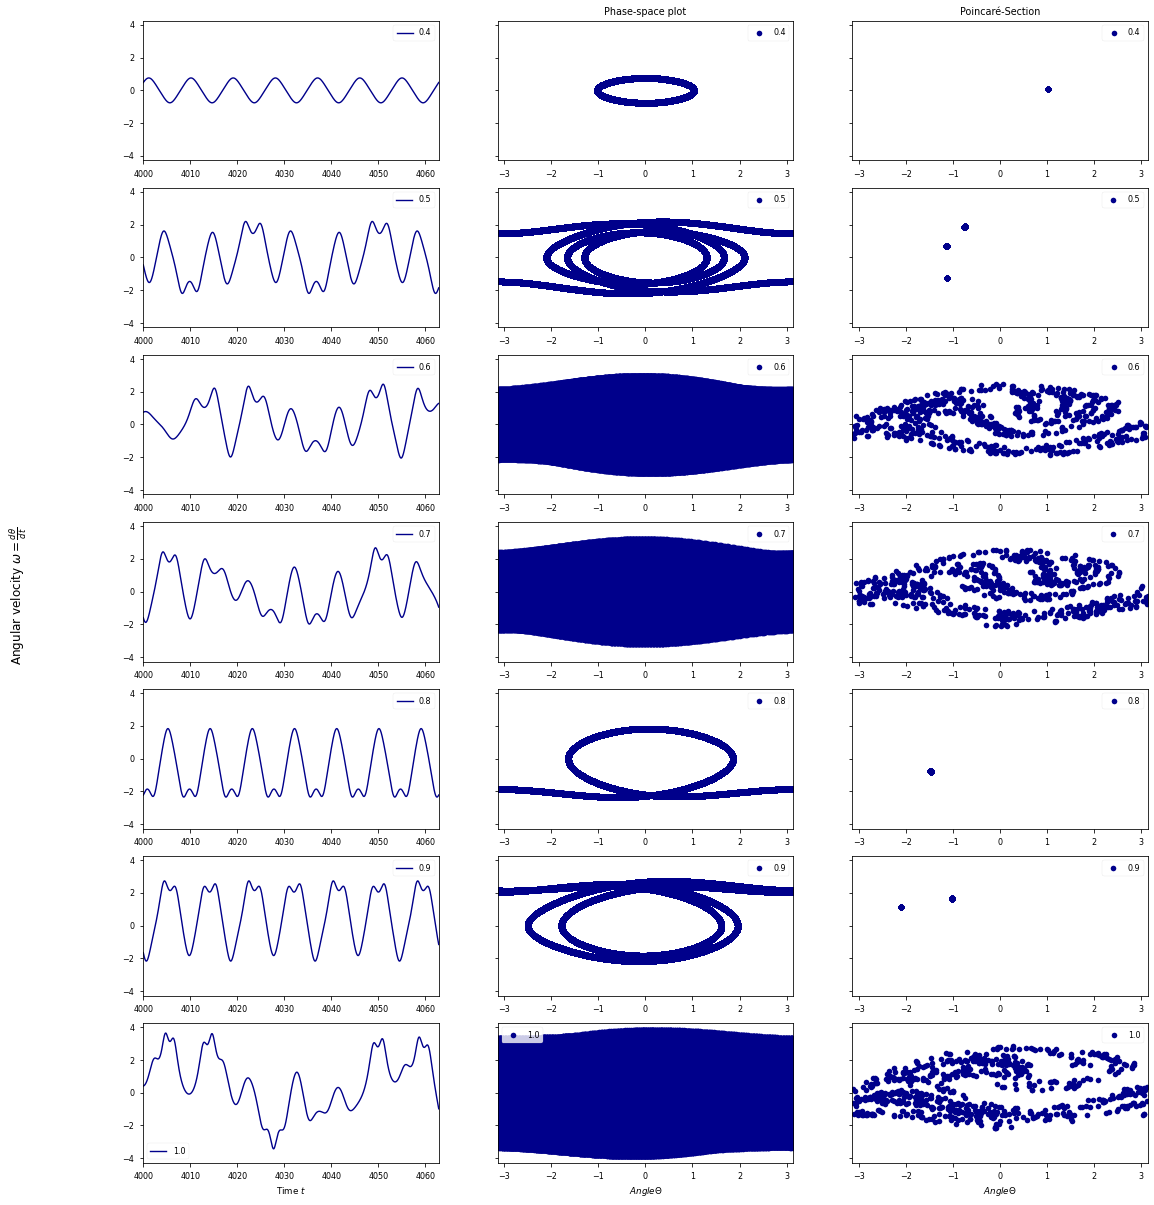

In [11]:
import math
import matplotlib.pyplot as plt

F_vetor = np.arange(0.4, 1.1, 0.1)
delta_poincare = 2*np.pi/w

fig, axs = plt.subplots(nrows=F_vetor.size, ncols=3, sharey=True, figsize=(18, 21))

z = 0
for f in F_vetor:
  F = f
  t, x, v = RK4_ordem2(dx, dv, h, x0, v0, t0 , int(10e3/h))
  t = t[400000:]
  v = v[400000:]
  x = x[400000:]

  for i, value in enumerate(x):
    if (value >= 0):
      resto = value % (2*np.pi)
      if (resto > np.pi):
        x[i] = resto - 2*np.pi
      else:
        x[i] = resto
    if (value < 0):
      resto = value % (-2*np.pi)
      if (resto < -np.pi):
        x[i] = (2*np.pi) + resto
      else:
        x[i] = resto
  x_poincare = []
  v_poincare = []

  for i in range(len(t)):
    resto = t[i] % delta_poincare
    if (resto < 0.01):
      x_poincare.append(x[i])
      v_poincare.append(v[i])
  plt.style.use('seaborn-paper')

  axs[z,0].plot(t,v, color='darkblue', label = round(F, 1))
  axs[z,0].set_xlim(4000, 4000+ 20*np.pi)
  axs[z,0].legend()
  axs[-1,0].set_xlabel('Time $t$')


  axs[z,1].plot(x,v, 'o', color='darkblue', label = round(F, 1))
  axs[z,1].set_xlim(-np.pi, np.pi)
  axs[z,1].legend()
  axs[0,1].set_title('Phase-space plot')
  axs[-1,1].set_xlabel((r"$Angle {\Theta}$"))

  axs[z,2].plot(x_poincare, v_poincare, 'o', color='darkblue', label = round(F, 1)) 
  axs[z,2].set_xlim(-np.pi, np.pi)
  axs[z,2].legend()
  axs[0,2].set_title('Poincaré-Section')
  axs[-1,2].set_xlabel(r"$Angle {\Theta}$")
  fig.supylabel(r'Angular velocity $\omega = \frac{d\theta}{dt}$')
  z+=1

plt.show()